In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Function to compute the output of a single neuron in a perceptron model
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i]  # Weighted sum of inputs
    return 1 if z >= 0 else -1  # Output is 1 if sum is >= 0, otherwise -1

In [3]:
def train_perceptron(X_train, y_train, epochs=10, learning_rate=0.1):
    # Initialize weights (randomly)
    weights = np.zeros(X_train.shape[1])  # Weights include the bias term
    for epoch in range(epochs):
        for i in range(len(X_train)):
            x_i = X_train[i]  # Input vector (including bias term)
            y_i = y_train[i]  # True label

            # Compute output using the perceptron model
            output = compute_output(weights, x_i)

            # Update the weights if the prediction is wrong
            if output != y_i:
                for j in range(len(weights)):
                    weights[j] += learning_rate * (y_i - output) * x_i[j]

    return weights

In [4]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Flattened images (28x28 -> 784)
y = mnist.target  # Target labels (0 to 9)

In [5]:
# Convert target labels to binary: '9' becomes 1, all other digits become -1
y_binary = np.where(y == '9', 1, -1)

In [6]:
# Add a column of 1's to account for the bias term in the input
X_with_bias = np.c_[np.ones(X.shape[0]), X]  # Add the bias term as the first column

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y_binary, test_size=0.2, random_state=42)

In [8]:
# Train the perceptron
weights = train_perceptron(X_train, y_train, epochs=10, learning_rate=0.1)

In [9]:
# Function to predict using the trained perceptron
def predict(weights, X):
    predictions = []
    for x in X:
        predictions.append(compute_output(weights, x))
    return np.array(predictions)

In [10]:
# Evaluate the perceptron on the test set
y_pred = predict(weights, X_test)

In [11]:
# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy of Perceptron on test set: {accuracy:.4f}')

Accuracy of Perceptron on test set: 0.9215


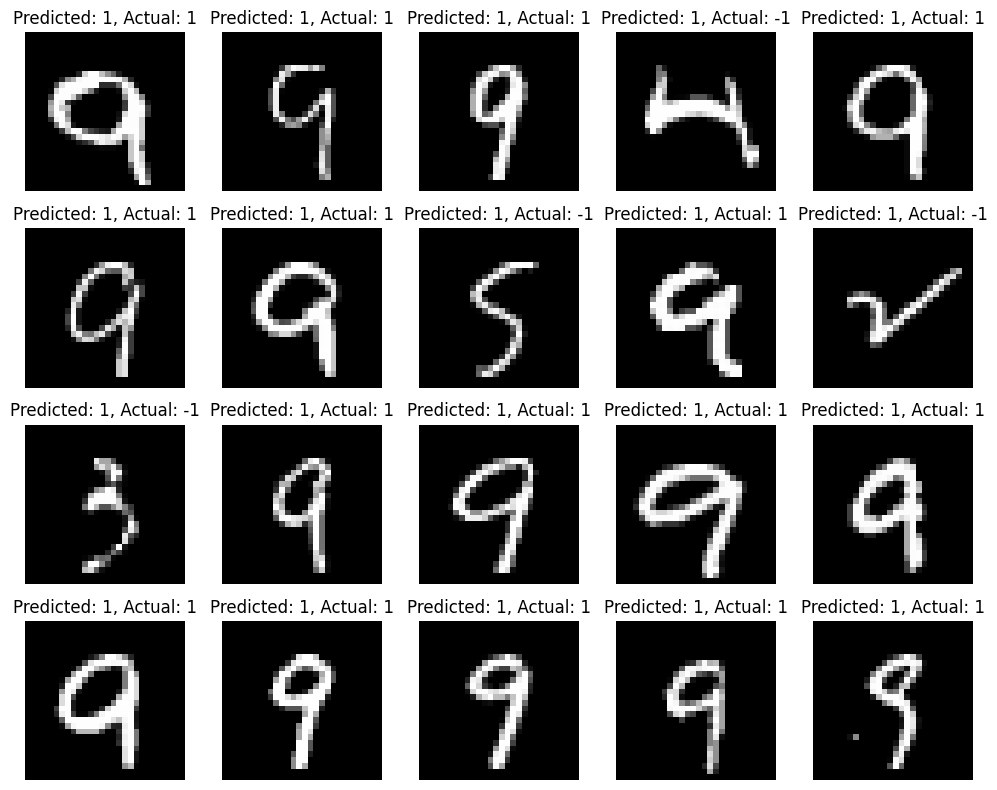

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get the indices where the predicted label is 1 (digit '9')
predicted_9_indices = np.where(y_pred == 1)[0]

# Define the number of rows and columns for the grid
rows = 4
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through the axes and the indices of predicted '9's to plot them
for i, ax in enumerate(axes):
    if i < len(predicted_9_indices):  # If there are still predicted 9s to plot
        sample_index = predicted_9_indices[i]
        ax.imshow(X_test[sample_index, 1:].reshape(28, 28), cmap='gray')
        ax.set_title(f'Predicted: {y_pred[sample_index]}, Actual: {y_test[sample_index]}')
    ax.axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()